## Header working example

### Subheader example

**text change sample (bold)**

*text change sample (italics)

In [1]:
import pandas as pd
parkinsons = pd.read_excel("C:\\Users\\Santi\\Desktop\\parkinsons_updrs.xls")
parkinsons

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [2]:
import pandas as pd
import numpy as np

parkinsons_df = pd.DataFrame(parkinsons) # this a data file that gets loaded

# Method chaining begins

df = (   
    parkinsons_df.rename(columns={"Jitter(Abs)": "Jitter_ms"})
    .assign(color_filter=lambda x: np.where((x.age > 70) & (x.Jitter_ms > .00002), 1, 0))
    .loc[lambda x: x['subject#']>2]
    .sort_values("subject#", ascending=False)
    .reset_index(drop=True)
    .loc[:, ["subject#", "Jitter_ms","age"]]
)

df

,subject#,Jitter_ms,age
0,42,0.000021,61
1,42,0.000052,61
2,42,0.000024,61
3,42,0.000037,61
4,42,0.000035,61
...,...,...,...
5576,3,0.000023,57
5577,3,0.000015,57
5578,3,0.000013,57
5579,3,0.000023,57


In [4]:
def load_and_process(df):

    # Method Chain 1 (Load data and deal with missing data)
    
    df1 = (pd.read_excel(df)
        .rename(columns={"Jitter(Abs)": "Jitter_ms"})
           .loc[lambda x: x['subject#']>2]
           .sort_values("subject#", ascending=True)
           .reset_index(drop=True)
           #.loc[:, ["subject#", "Jitter_ms","age"]]
           
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1.drop(columns=['Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA','Jitter:RAP','Jitter:PPQ5','Jitter:DDP'])
        #.assign(color_filter=lambda x: np.where((x.age > 70) & (x.Jitter_ms > .00002), 1, 0))
      )

    # Make sure to return the latest dataframe

    return df2

In [6]:
load_and_process("C:\\Users\\Santi\\Desktop\\parkinsons_updrs.xls")

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter_ms,Shimmer,Shimmer(dB),NHR,HNR,RPDE,DFA,PPE
0,3,57,0,7.28820,23.437,25.729,0.00565,0.000031,0.02518,0.246,0.029994,24.756,0.34321,0.56409,0.16791
1,3,57,0,147.30000,28.315,38.427,0.00299,0.000018,0.01411,0.157,0.015223,28.319,0.44385,0.53129,0.12000
2,3,57,0,154.31000,28.213,38.935,0.00405,0.000023,0.01676,0.166,0.011266,24.871,0.48615,0.60457,0.18151
3,3,57,0,161.28000,28.112,39.441,0.00198,0.000013,0.01511,0.142,0.002773,28.397,0.45309,0.55500,0.10926
4,3,57,0,168.27000,28.011,39.947,0.00231,0.000015,0.01416,0.138,0.004072,27.369,0.43286,0.55108,0.14440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,42,61,0,-4.26180,19.725,28.633,0.00626,0.000048,0.02218,0.200,0.033013,24.559,0.47991,0.65597,0.22585
5577,42,61,0,0.39653,20.026,29.034,0.00388,0.000035,0.02195,0.192,0.008689,23.567,0.54389,0.59552,0.15073
5578,42,61,0,9.71110,20.627,29.835,0.00507,0.000037,0.04080,0.385,0.047796,23.239,0.62118,0.61052,0.23729
5579,42,61,0,23.75900,21.533,31.044,0.00585,0.000046,0.01691,0.161,0.017788,25.860,0.45188,0.65104,0.27596


In [2]:
import pandas as pd
parkinsons = pd.read_excel("C:\\Users\\Santi\\Desktop\\parkinsons_updrs.xls")
pd.DataFrame.from_dict(parkinsons)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
df = pd.DataFrame(parkinsons) 
df.shape
df.head()
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [22]:
dfinfo = df[["age", "total_UPDRS"]]

In [23]:
dfinfo.isnull().sum()

age            0
total_UPDRS    0
dtype: int64

In [24]:
dfinfo.nunique(axis=0)
dfinfo.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,age,total_UPDRS
count,5875.000000,5875.000000
mean,64.804936,29.018942
std,8.821524,10.700283
min,36.000000,7.000000
25%,58.000000,21.371000
50%,65.000000,27.576000
75%,72.000000,36.399000
max,85.000000,54.992000


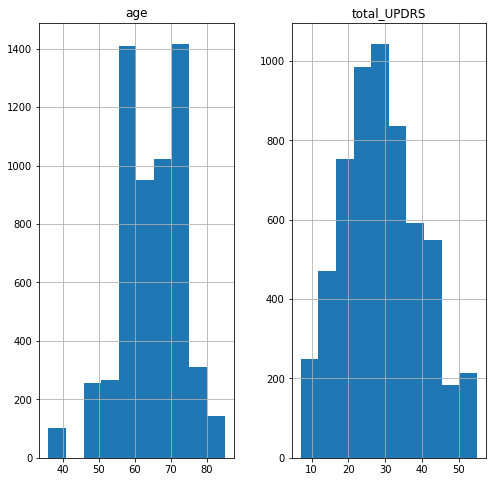

In [38]:
hist = df2.hist(bins=10,figsize =(8,8))

<AxesSubplot:xlabel='age', ylabel='total_UPDRS'>

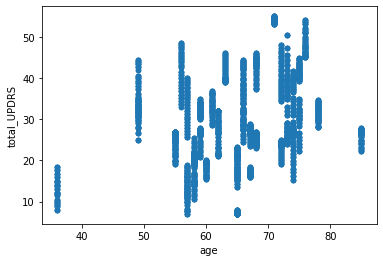

In [28]:
dfinfo.plot(kind='scatter', x='age', y='total_UPDRS')

Plotting age against total UPDRS allows for easy observation of disease development in different ages.

In [41]:
dfinfo = df[["total_UPDRS", "test_time"]]

In [42]:
dfinfo.isnull().sum()

total_UPDRS    0
test_time      0
dtype: int64

In [43]:
dfinfo.nunique(axis=0)
dfinfo.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,total_UPDRS,test_time
count,5875.000000,5875.000000
mean,29.018942,92.863722
std,10.700283,53.445602
min,7.000000,-4.262500
25%,21.371000,46.847500
50%,27.576000,91.523000
75%,36.399000,138.445000
max,54.992000,215.490000


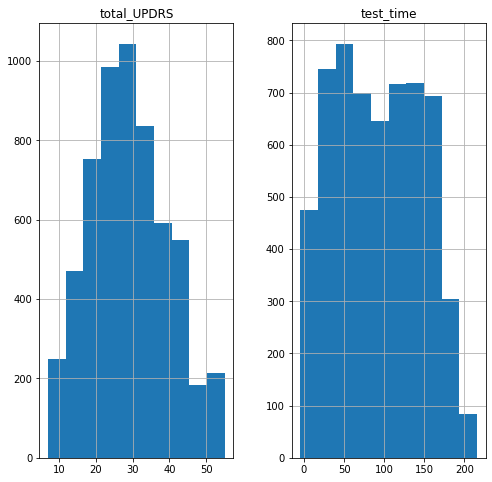

In [44]:
hist = dfinfo.hist(bins=10,figsize =(8,8))

<AxesSubplot:xlabel='total_UPDRS', ylabel='test_time'>

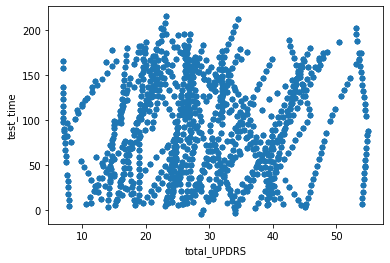

In [47]:
dfinfo.plot(kind='scatter', x="total_UPDRS", y="test_time")

Here we plot total UPDRS against test time, and observe that there are quite a lot of variances and abrubt changes as time of testing goes on.